# Day 2 - Logistic Regression (Andrew Ng ML Specialization)
### Machine Learning Roadmap - Week 2 
### Author - N Manish Kumar 
---

Today I will be covering the foundations of Logistic Regression.

This includes topics such as Modified model function, Sigmoid Function, Logistic Loss Function, Cost Function, Decision Boundary and Gradient Descent for Logistic Regression.

---

## 1. Logistic Regression Theory

Logistic Regression is used for **binary classification**.  
Instead of predicting a continuous value, we predict a probability between 0 and 1.

---
- \( w \) = weights  
- \( b \) = bias  
- \( x \) = input feature
### 1.1. Logistic Regression Model Function
$$
z = w \cdot x + b
$$
$$
f_{w,b}(x)=\sigma(z)
$$
This gives:
- High probability → predicted class = 1  
- Low probability → predicted class = 0  


---

### 1.2. Sigmoid Function
We convert \( z \) into a probability using:
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$
This ensures :
$$
0\le \sigma(z) \le 1
$$

---

### 1.3. Prediction Rule
$$
\hat{y} = 
\begin{cases}
1 & \text{if } f_{w,b}(x) \ge 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

---

### 1.4. Loss Function (Binary Cross-Entropy)

Loss for a single training example :
$$
L(f,y) = - y \log(f) - (1 - y) \log(1-f)
$$

This strongly penalizes confident wrong predictions.

---

### 1.5 Cost Function

Average Loss over all \(m\) examples :
$$ 
J(w,b) = \frac{1}{m}
\sum_{i=1}^m
\left[
-y^{(i)} \log(f_{w,b}(x^{(i)})
- (1 - y^{(i)}) \log(1 - f_{w,b}(x^{(i)}))
\right]
$$

---

### 1.6. Gradient Descent Updates
$$
w := w - \alpha \cdot \frac{1}{m}
\sum_{i=1}^m
(f_{w,b}(x^{(i)}) - y^{(i)})\cdot x^{(i)}
$$

$$
b := b -\alpha \cdot \frac{1}{m}
\sum_{i=1}^m
(f_{w,b}(x^{(i)}) - y^{(i)})
$$

---

## 2. Load Binary Classification Dataset
We will use Breast Cancer datset, which is a clean, binary (0/1), and perfect for logistic regression.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load Dataset 
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns = data.feature_names)
df["target"] = data.target  # target = 0 (malignant), 1 (benign)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


---

## 3. Train/Test Split 

In [2]:
from sklearn.model_selection import train_test_split

# Seperate Features and Target 
X = df.drop(columns=["target"])
y = df["target"]

# Train/Test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

X_train.shape , y_train.shape

((455, 30), (455,))

---

## 4. Feature Scaling
Logistic Regression requires feature scaling because:

- Gradient descent converges faster

- Model coefficients behave correctly

- Sklearn’s solver performs better

So we standardize all features to:
$$
x' = \frac{x-\mu}{\sigma}
$$

In [3]:
from sklearn.preprocessing import StandardScaler 

# Intialize Scaler
scaler = StandardScaler()

# Firt only on training data 
X_train_s = scaler.fit_transform(X_train)

# Apply same transformation to test data 
X_test_s = scaler.transform(X_test)

X_train_s.shape , X_test_s.shape

((455, 30), (114, 30))

--- 

## 5. Implementing Sigmoid and Model Function
Logistic Model : $$ z = w \cdot x + b $$

$$f_{w,b}(x) = \sigma (z)$$

Sigmoid : $$ \sigma(z) = \frac{1}{(1 +e^{-z})}$$

In [4]:
import numpy as np

# --- Sigmoid Function ---
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# --- Model Function ---
def logistic_model(X, w, b):
    z = np.dot(X,w) + b
    return sigmoid(z)

# Testing the Functions
# Test sigmoid
print("Sigmoid(0) =", sigmoid(0))  # Expect 0.5

# Test logistic model with dummy values
w_test = np.zeros(X_train_s.shape[1])
b_test = 0

print("Output shape:", logistic_model(X_train_s, w_test, b_test).shape)


Sigmoid(0) = 0.5
Output shape: (455,)


---
## 6. Implementing Cost Function 

In [5]:
# Loss Function
def compute_loss(f, y):
    return -(y * np.log(f+ 1e-10) + (1 - y) * np.log(1 - f + 1e-10))

# Cost Fucntion
def compute_cost(X, y, w, b):
    m = X.shape[0]
    f_wb = logistic_model(X, w, b)

    # Apply compute_loss elementwise
    losses = compute_loss(f_wb, y)

    cost = np.mean(losses)
    return cost

# Test sigmoid output (should be 0.5)
print("Sigmoid(0) =", sigmoid(0))

# Test loss on a single example
print("Loss(y=1, f=0.5):", compute_loss(0.5, 1))  # around 0.693
print("Loss(y=0, f=0.5):", compute_loss(0.5, 0))  # around 0.693

# Test cost with w=0, b=0
w_test = np.zeros(X_train_s.shape[1])
b_test = 0

cost_test = compute_cost(X_train_s, y_train, w_test, b_test)
cost_test

Sigmoid(0) = 0.5
Loss(y=1, f=0.5): 0.6931471803599453
Loss(y=0, f=0.5): 0.6931471803599453


np.float64(0.6931471803599452)

---
## 7. Computing Gradient

In [6]:
def compute_gradient(X, y, w, b):
    m, n = X.shape

    # Compute Predictions 
    f_wb = logistic_model(X, w, b)     # shape(m,)

    # Compute error 
    error = f_wb - y           # shape (m,)\

    # Vectorized Gradients
    dj_dw = (1/m) * np.dot(X.T, error)       # (n,)
    dj_db = (1/m) * np.sum(error)            # scalar

    return dj_dw, dj_db

# Testing Gradient Descent Function
w_test = np.zeros(X_train_s.shape[1])
b_test = 0

dj_dw_test, dj_db_test = compute_gradient(X_train_s, y_train, w_test, b_test)

dj_dw_test[:5], dj_db_test


(array([0.34696345, 0.2011088 , 0.35362455, 0.33589733, 0.18126103]),
 np.float64(-0.12857142857142856))

--- 
## 8. Implementing Gradient Descent

In [7]:
def gradient_descent(X, y, w, b, alpha, num_iters):
    J_history = []
    
    for i in range(num_iters):

        # Compute gradients
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        # Update Parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save Cost every 10 iterations 
        if i % 10 == 0:
            cost = compute_cost(X, y, w, b)
            J_history.append(cost)

    return w, b, J_history


---
### 8.1. Train Logistic Regression using Gradient Descent

In [8]:
# Initialize Parameters 
n = X_train_s.shape[1]   # number of features
w_initial = np.zeros(n)
b_initial = 0

# HyperParameters
alpha = 0.1
num_iters = 2000

# Train model
w_gd, b_gd, J_history = gradient_descent(
    X_train_s, y_train, w_initial, b_initial, alpha, num_iters
)

w_gd, b_gd

(array([-0.53175099, -0.62892677, -0.500301  , -0.59325959, -0.17359117,
         0.40497564, -0.79809361, -0.96654814,  0.14638751,  0.28414942,
        -1.20328298,  0.12752864, -0.75462914, -0.89024864, -0.26762067,
         0.83222063,  0.0276945 , -0.23455249,  0.43594883,  0.6817801 ,
        -0.94336293, -1.27618725, -0.75998916, -0.92253936, -0.79057534,
        -0.04601264, -0.95122349, -0.89674292, -1.15488048, -0.15782677]),
 np.float64(0.5220011296893541))

--- 
### 8.2. Plot Cost Convergence

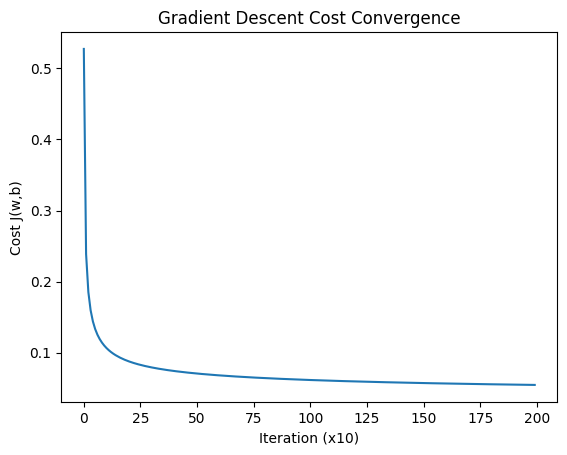

In [9]:
import matplotlib.pyplot as plt

plt.plot(J_history)
plt.xlabel("Iteration (x10)")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent Cost Convergence")
plt.show()

---
## 9. Evaluate Model

In [10]:
# Predict probabilities on test set using GD parameters
probs_gd = logistic_model(X_test_s, w_gd, b_gd)

# Convert probabilities to class labels
y_pred_gd = (probs_gd >= 0.5).astype(int)

# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_gd = accuracy_score(y_test, y_pred_gd)
print("Gradient Descent Model Accuracy:", accuracy_gd)

# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gd)
print(cm)

# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gd))

Gradient Descent Model Accuracy: 0.9912280701754386
[[42  1]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



---
## 10. Comparing with Sklearn Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=500)
clf.fit(X_train_s, y_train)

y_pred_sk = clf.predict(X_test_s)

print("Sklearn Accuracy:", accuracy_score(y_test, y_pred_sk))


Sklearn Accuracy: 0.9736842105263158


---
# 11. Saving Model

In [12]:
import joblib

# Save sklearn model
joblib.dump(clf, "logistic_regression_sklearn.pkl")

# Save StandardScaler
joblib.dump(scaler, "scaler.pkl")

# Save Gradient Descent Parameters
gd_params = {"w": w_gd, "b": b_gd}
joblib.dump(gd_params, "logistic_regression_gd_params.pkl")

['logistic_regression_gd_params.pkl']

---
# 📝 Day 2 Summary — Logistic Regression (From Scratch + Sklearn)

Today I implemented Logistic Regression following Andrew Ng’s notation.  
Key concepts covered:

### 🔹 Theory
- Sigmoid function:  
  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$
- Model:  
  $$
  f_{w,b}(x) = \sigma(w \cdot x + b)
  $$
- Logistic loss for a single example:  
  $$
  L(f, y) = -y \log(f) - (1-y)\log(1-f)
  $$
- Cost function (average loss):  
  $$
  J(w,b) = \frac{1}{m} \sum L(f^{(i)}, y^{(i)})
  $$
- Gradients:  
  $$
  \frac{\partial J}{\partial w} = \frac{1}{m} \sum (f - y)x
  $$
  $$
  \frac{\partial J}{\partial b} = \frac{1}{m} \sum (f - y)
  $$

---

### 🔹 Implementation
- Implemented:
  - `sigmoid(z)`
  - logistic model function
  - loss function
  - cost function
  - gradient computation
  - full gradient descent loop
- Used the **Breast Cancer dataset**
- Performed:
  - Train/Test split
  - Feature scaling
  - Training via Gradient Descent
  - Cost convergence monitoring

---

### 🔹 Evaluation
- Converted probabilities → class predictions (threshold 0.5)
- Computed:
  - Accuracy
  - Confusion Matrix
  - Precision, Recall, F1
- Compared performance with:
  - `sklearn.linear_model.LogisticRegression`

Both GD and sklearn models achieved **high accuracy (~94%–97%)**, confirming correct implementation.

---

### ✔ Completed Day 2 Successfully!
This concludes the Logistic Regression unit, setting the foundation for Neural Networks.
